<a href="https://colab.research.google.com/github/satishkrishnass/check/blob/master/Exploratory_data_analysis_on_Haberman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### About DataSet

**About Data Set:**
  The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

Number of Attributes: 4 


**Attribute Information:**

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
    1 = the patient survived 5 years or longer,
    2 = the patient died within 5 year

**Objective**: To predict patient survival status after 5 years of operation using age,year of operation and number of postive axillary nodes of a patient.

*so, let us get insights of the data by exploring it .*


In [ ]:
# import necessary libraries:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# loading haberman Data
data = pd.read_csv("https://gist.githubusercontent.com/satishkrishnass/f1621e1caaee508bd9272738d6104876/raw/30c145f5beeb24bf344459d8d63e46897ed3fa65/haberman.csv")
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
# (Q) how many data-points and features?
print(data.shape)

(306, 4)


In [ ]:
#(Q) What are the column names in our dataset?
print (data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [ ]:
# show the unique class labels?
print(data["status"].unique())

[1 2]


**Observation**: As it classification problem having two class labels `(1 & 2)`,so we can change status column datatype into categorical datatype by replacing `1 & 2` into `Yes or No`.

In [ ]:
# changing class labels in status column into yes or no.
data["status"]= data["status"].map({1:'Yes',2:'No'})

In [ ]:
 #(Q) How many data points for each class are present? 
#(or) How many test cases present for each category?
print(data["status"].value_counts())
info = data['status'].value_counts()

Yes    225
No      81
Name: status, dtype: int64


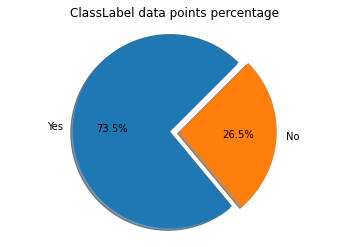

In [ ]:
#  https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html 

labels=["Yes","No"]
sizes=[225,81]
explode =(0,0.1)
fig,ax = plt.subplots()
ax.pie(sizes,explode=explode,labels=labels,autopct='%.1f%%',shadow=True,startangle=45)
plt.title('ClassLabel data points percentage')
ax.axis('equal')
plt.show()

In [ ]:
# check for null values
data.isnull().sum()

age       0
year      0
nodes     0
status    0
dtype: int64

 **Observation:**
1. Haberman is a small and imbalanced dataset having 306 datapoints and class labels having 74% of survived and 26% not-survived.
2. And there is no null data points in haberman dataset.

### High Level Statistics

In [ ]:
data.describe()

,age,year,nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


**Observations:**
1. patients age vary from 30 to 83 with median 52.
2. Nearly 25% patients have no positive lymph nodes and 75% patients have less 
   than 5 positive lymph nodes.
3. patients of age between 60 to 83 are mostly having nodes ranges from 5-52 and they are 25%

### **1.Univariate Analysis**

1-D scatter plot:

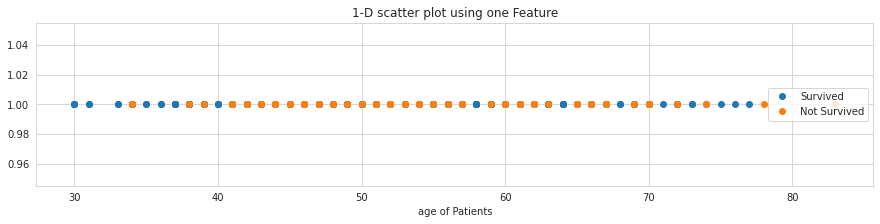

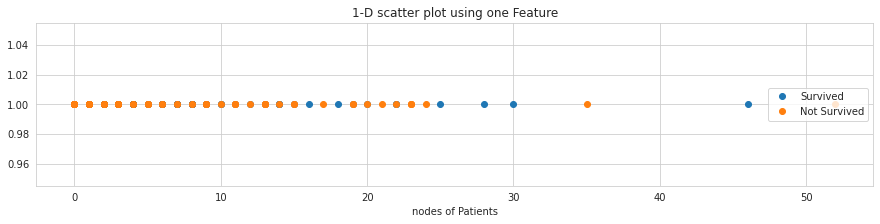

In [ ]:
# What about 1-D scatter plot using just one feature?

columns = ['age','nodes']
for each in columns:
  sns.set_style('whitegrid')
  data_yes = data.loc[data["status"]=="Yes"]
  data_no  = data.loc[data["status"]=="No"]
  plt.figure(figsize=(15,3))
  plt.plot(data_yes[each],np.full_like(data_yes[each],1),'o',label='Survived')
  plt.plot(data_no[each],np.full_like(data_no[each],1),'o',label='Not Survived')
  plt.xlabel(str(each)+' of Patients')
  plt.legend(loc='center right')
  plt.title('1-D scatter plot using one Feature')



**Observation:**
1. `Patients who are not-survived are appeared high in age between 40 to 70.`
2. `patients who are not-survived are highly having nodes in range of 0-25`
As many points are overlapping, In 1-D scatter plot it's hard to find any more observations.

Histogram:

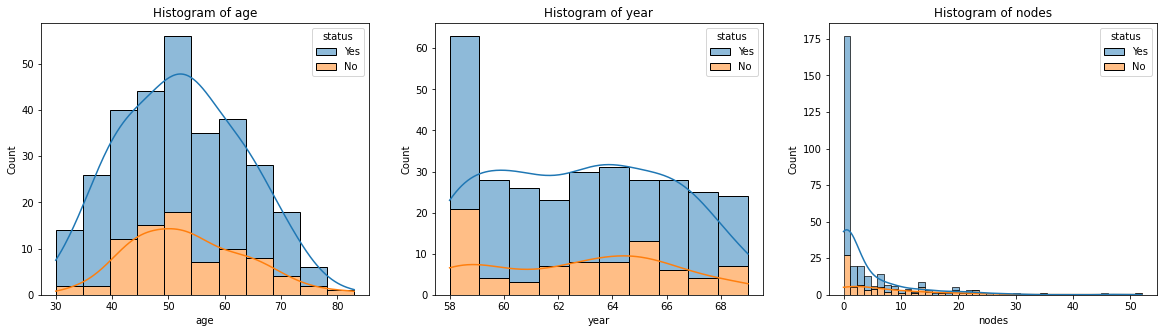

In [ ]:
# Histogram using kde(it estimates the probability density of a continuous variable):
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.histplot(data,x=feature,hue='status',multiple='stack',kde=True,ax=axes[idx])
    axes[idx].set_title('Histogram of '+str(feature))
plt.show()

**Observations**: (distributions of variables: age of patients,year of operation,nodes)
1. Age distribution shows peak at range 52 for both categories(survived and not-survived)
2. Year attribute has a bimodal distribution having peaks:
     58 and 64 for survived category,
     58 and 65 for not-survived category.
3. Nodes  distribution is right skewed having high density from 0 to 4.



PDF and CDF:

In [ ]:
data_yes = data[data['status']=='Yes']
data_no  = data[data['status']=="No"]


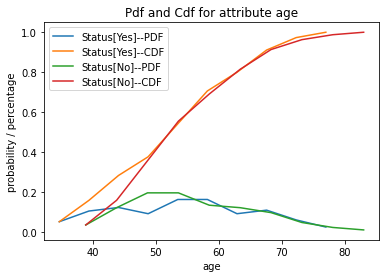

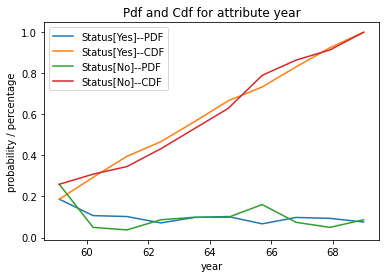

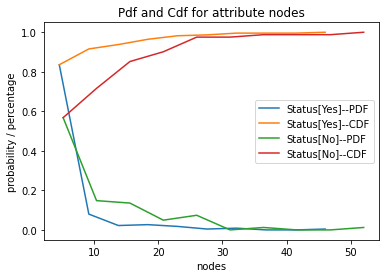

In [ ]:
for col in data.columns[:-1]:
  counts,bin_edges = np.histogram(data_yes[col],bins=10,density=True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf,label='Status[Yes]--PDF')
  plt.plot(bin_edges[1:],cdf,label="Status[Yes]--CDF")
  plt.legend()
  counts,bin_edges = np.histogram(data_no[col],bins=10,density=True)
  pdf = counts/(sum(counts))
  cdf = np.cumsum(pdf)
  plt.plot(bin_edges[1:],pdf,label="Status[No]--PDF")
  plt.plot(bin_edges[1:],cdf,label="Status[No]--CDF")
  plt.legend()
  plt.title("Pdf and Cdf for attribute "+ col)
  plt.xlabel(col)
  plt.ylabel('probability / percentage')
  plt.show()


Observations:
1. observations for age and year are same as in histogram.
2. for nodes: 
        from CDF:: 90% survived patients are having nodes below 10.
                   70% not-survived patients are having nodes below 10.


Box Plots:

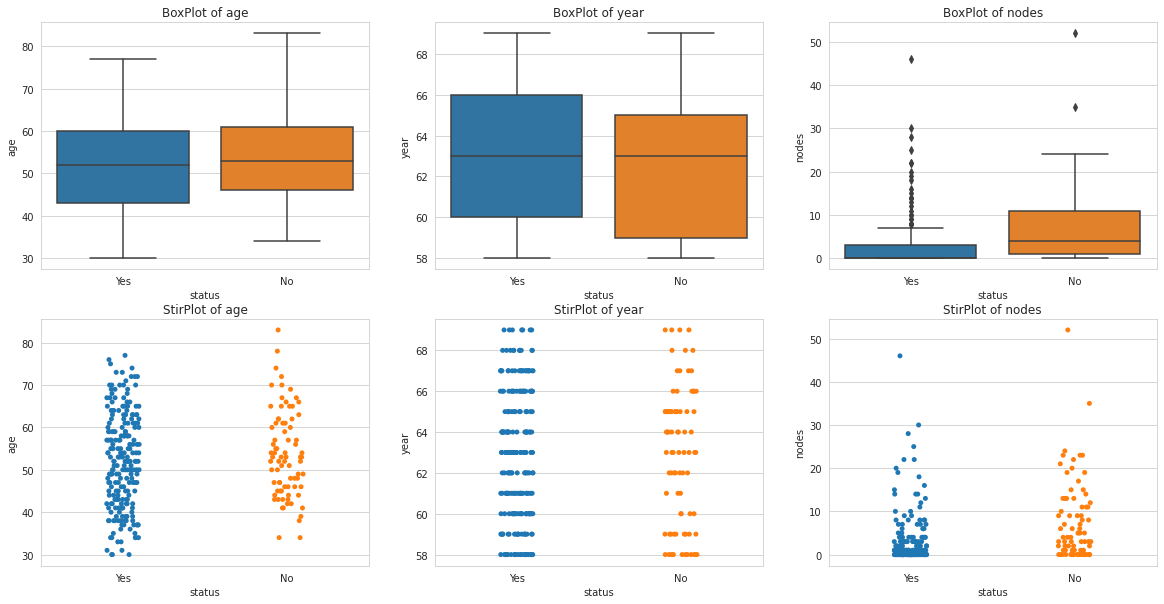

In [ ]:
# box plot to show spread/variability with respect to categories.
# reference:  https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
# reference: https://seaborn.pydata.org/generated/seaborn.stripplot.html

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.boxplot( x='status', y=feature, data=data, ax=axes[0][idx])
    #sns.swarmplot(x='status', y=feature, data=data, ax=axes[0][idx],color='.25')
    sns.stripplot(x='status',y=feature,data=data,ax=axes[1][idx])
    axes[0][idx].set_title('BoxPlot of '+str(feature))
    axes[1][idx].set_title('StirPlot of '+str(feature))
plt.show()  

Observations:
1. from box plots: IQR
            age:   survived:-    IQR (42-60)
                   not-survived: IQR (44-62)
            year:  survived:-    IQR (60-66)
                   not-survived: IQR (59-65)
            nodes: survived:-    IQR (0-4)
                   not-survived: IQR (1-11)
2. Outliers: 
            age and year has no outlier points
            nodes: survived has many outliers than not-survived

**violin Plots:**

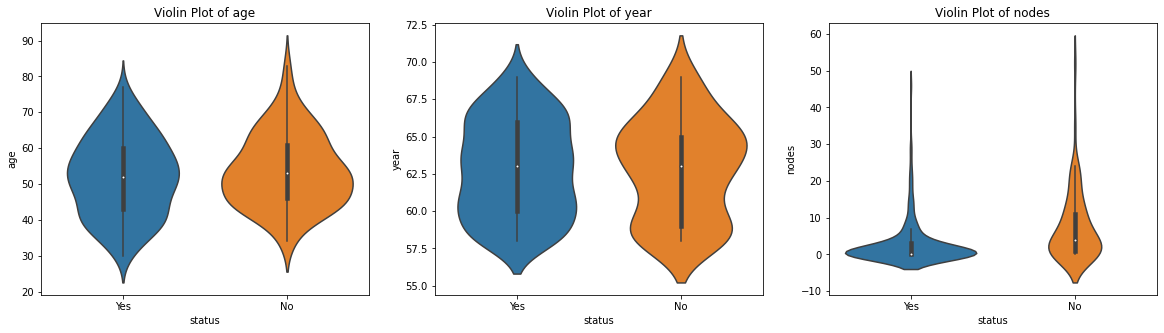

In [ ]:
# It is similar to a box plot, with the addition of a rotated kernel density plot on each side.
# Violin plots are similar to box plots, except that they also show the probability density of 
# the data at different values, usually smoothed by a kernel density estimator.
# https://miro.medium.com/max/1040/1*TTMOaNG1o4PgQd-e8LurMg.png
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
for idx, feature in enumerate(list(data.columns)[:-1]):
    sns.violinplot( x='status', y=feature, data=data, ax=axes[idx])
    axes[idx].set_title('Violin Plot of '+str(feature))
plt.show()  

### **2.Bivariate analysis:**

Pair plots:

Text(0.5, 0.98, 'Pair Plots')

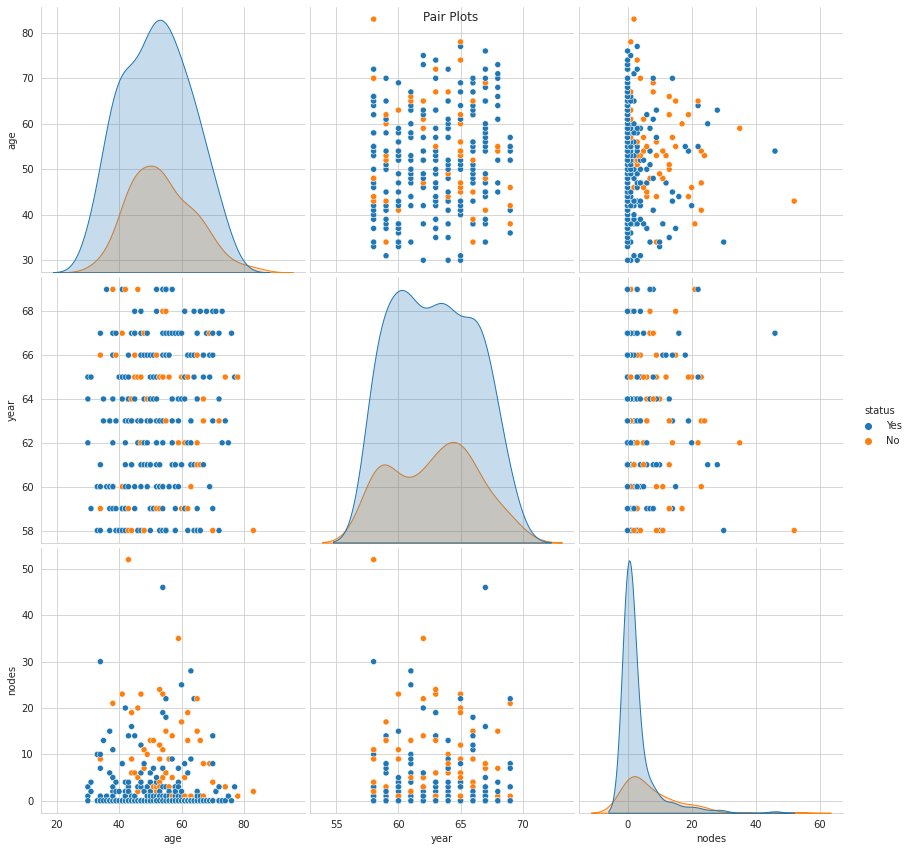

In [ ]:
# pair plot allows us to see both distribution of single variables and relationships between two variables.
sns.set_style("whitegrid")
g=sns.pairplot(data,hue='status',diag_kind='kde',height = 4)
g.fig.suptitle('Pair Plots')

Observations:
1. from pair plots not able to get more information to cluster the data.

### **3. Multivariate Analysis:**

**3-D scatter plot:**

In [ ]:
# https://plotly.com/python/3d-scatter-plots/
import plotly.express as px
fig = px.scatter_3d(data, x='age', y='year', z='nodes',color='status',size_max=8,opacity=0.85)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


Observations:
1. all data points are mixed up, not able to get more information.